In [1]:
import numpy as np
import matplotlib.pyplot as plt

The 1D Kuramoto-Sivashinsky equation can be written as

$$
\frac{\partial u}{\partial t} = -u \frac{\partial u}{\partial x} - \frac{\partial^2 u}{\partial x^2} - \frac{\partial^4 u}{\partial x^4}
$$

We solve for $x \in [0,32\pi], t \in [0, 150],$ and use the initial condition

$$
u(x,0) = \sin \left(\frac{x}{16}\right)
$$

In [29]:
# Code adapted from: https://ora.ox.ac.uk/objects/uuid:223cd334-15cb-4436-8b77-d30408f684c5/download_file?safe_filename=NA-03-14.pdf&file_format=application%2Fpdf&type_of_work=Report

N = 128
x = 60*np.arange(1,N+1)/N - 30 #32*np.pi*np.arange(1,N+1)/N
u = np.exp(-x**2) #np.sin(x/16)#*(1+np.sin(x/16))
v = np.fft.fft(u)

h = 0.25
k = np.concatenate([np.arange(0,N/2), np.array([0]), np.arange(-N/2+1,0)])/16
L = k**2 - k**4
E = np.exp(h*L)
E2 = np.exp(h*L/2)
M = 16
r = np.exp(1j*np.pi*(np.arange(1,M+1)-0.5)/M)
LR = h*np.tile(L, (M,1)).T + np.tile(r, (N,1))
Q = h*np.real(np.mean((np.exp(LR/2)-1)/LR, axis=1))
f1 = h*np.real(np.mean((-4-LR+np.exp(LR)*(4-3*LR+LR**2))/(LR**3), axis=1))
f2 = h*np.real(np.mean((2+LR+np.exp(LR)*(-2+LR))/(LR**3), axis=1))
f3 = h*np.real(np.mean((-4-3*LR-(LR**2)+np.exp(LR)*(4-LR))/(LR**3), axis=1))

In [30]:
uu = np.reshape(u, (-1, 1))
tt = [0]
tmax = 30 #150
nmax = int(np.round(tmax/h))
nplt = int(np.floor((tmax/100)/h))
g = 0.5j*k

for n in range(1, nmax+1):
    t = n*h
    Nv = g*np.fft.fft(np.real(np.fft.ifft(v))**2)
    a = E2*v + Q*Nv
    Na = g*np.fft.fft(np.real(np.fft.ifft(a))**2)
    b = E2*v + Q*Na
    Nb = g*np.fft.fft(np.real(np.fft.ifft(b))**2)
    c = E2*a + Q*(2*Nb-Nv)
    Nc = g*np.fft.fft(np.real(np.fft.ifft(c))**2)
    v = E*v + Nv*f1 + 2*(Na+Nb)*f2 + Nc*f3
    if n % nplt == 0:
        u = np.reshape(np.real(np.fft.ifft(v)), (-1, 1))
        uu = np.append(uu, u, axis=1)
        tt.append(t)
tt = np.array(tt)

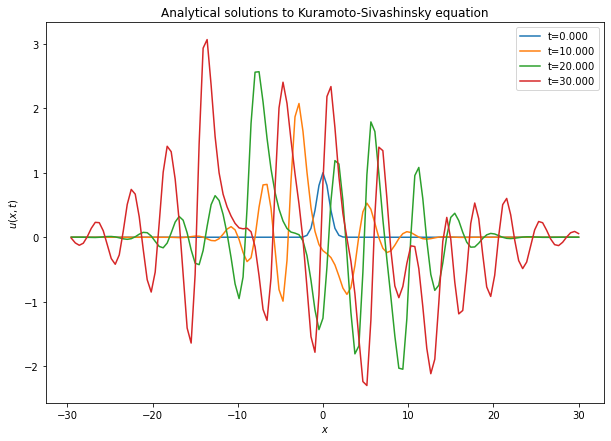

In [31]:
fig, ax = plt.subplots(figsize=(10,7))
t_idx = [int(idx) for idx in np.linspace(0, len(tt)-1, 4)]
for t_id in t_idx:
    sol = uu.T[t_id]
    t_i = tt[t_id]
    ax.plot(x, sol, label=f"t={t_i:.3f}")
    ax.set_xlabel("$x$")
    ax.set_ylabel("$u(x,t)$")
    ax.set_title("Analytical solutions to Kuramoto-Sivashinsky equation")
ax.legend()
plt.show()

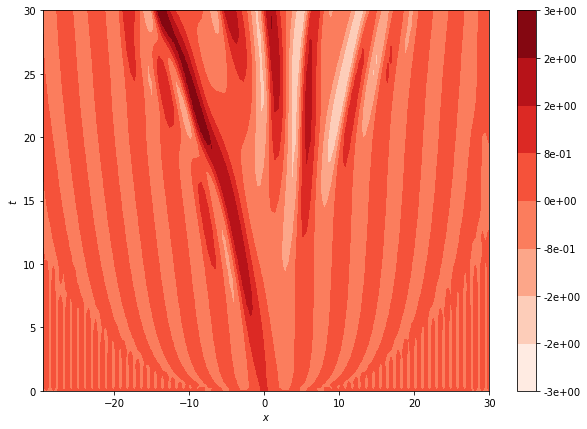

In [32]:
fig, ax = plt.subplots(figsize=(10,7))
x_grid, t_grid = np.meshgrid(x, tt)
cf = ax.contourf(x_grid, t_grid, uu.T, cmap="Reds")
cb = fig.colorbar(cf, format='%.0e', ax=ax)
ax.set_xlabel("$x$")
ax.set_ylabel("$t$")
plt.show()

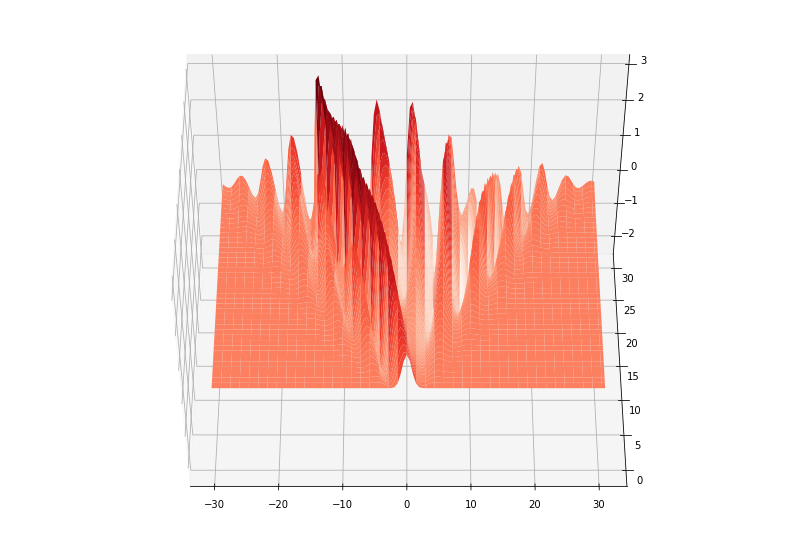

In [41]:
fig = plt.figure(figsize=(14,10))
ax = fig.add_subplot(projection="3d")
ax.plot_surface(x_grid, t_grid, uu.T, cmap="Reds")
ax.view_init(azim=-90, elev=50)
plt.show()

In [ ]:
# https://www.sciencedirect.com/science/article/pii/S0307904X11004082#b0210